# Acerca Del Conjunto De Datos

## Descripción:

¿Tiene curiosidad acerca de los factores que influyen en los cambios de carrera? ¿Quiere explorar cómo el campo de estudio de una persona afecta su probabilidad de seguir o cambiar de carrera? ¡No busques más! El campo de estudio versus la ocupación El conjunto de datos está diseñado para ayudarle a predecir si es probable que las personas cambien de ocupación en función de su formación académica, experiencia laboral y otros factores demográficos. Este rico conjunto de datos contiene más de 30 000 registros y presenta 22 atributos, incluidos detalles personales, satisfacción laboral, brecha de habilidades, crecimiento de la industria y mucho más. La variable objetivo del conjunto de datos, "Probable que cambie de ocupación", indica si una persona corre el riesgo de cambiar de carrera.

## ¿Por Qué Es Interesante Este Conjunto De Datos?

Este conjunto de datos ofrece una oportunidad única de aplicar modelos de aprendizaje automático para predecir cambios profesionales en función de una variedad de factores que afectan la satisfacción laboral, el crecimiento profesional y las circunstancias personales. Es un gran conjunto de datos para cualquiera interesado en:
- Explore la ingeniería de funciones y prediga por qué las personas cambian de trabajo.

- Aprender a construir modelos predictivos para análisis de recursos humanos y desarrollo profesional.

- ¡Practica tu aprendizaje automático de células grises!

## Algunas De Las Preguntas De Ejemplo Que Se Pueden Responder Usando Esto:

- Recursos humanos: prediga la posible rotación de empleados o patrones de transición profesional.

- Asesoramiento profesional: ayude a las personas a comprender la progresión de su carrera y a tomar decisiones informadas sobre movimientos futuros.

- Análisis de la industria: analice las tendencias en los cambios de la industria y las ocupaciones emergentes.

- Información sobre el mercado laboral: obtenga una mejor comprensión del panorama cambiante de las profesiones y la formación educativa que mejor se alinea con los mercados laborales futuros.

In [26]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
import utils_profe
from IPython.display import HTML, Image

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize,RobustScaler, OneHotEncoder, LabelEncoder
from tabulate import tabulate
import matplotlib.pyplot as plt


In [2]:
def ver_diccionario(diccionario_file):
    # Carga del diccionario de datos desde el archivo CSV
    # Asegúrate de reemplazar 'diccionario.csv' por el nombre de tu archivo
    diccionario = pd.read_csv(f'../data/{diccionario_file}')

    # Mostrar los datos tabulados con `tabulate`
    tabla = tabulate(diccionario, headers='keys', tablefmt='fancy_grid', showindex=False)

    # Imprimir la tabla
    print(tabla)

In [3]:
def ver_dic2df(diccionario_file):
    # Carga del diccionario de datos desde el archivo CSV
    # Asegúrate de reemplazar 'diccionario.csv' por el nombre de tu archivo
    diccionario = pd.read_csv(f'../data/{diccionario_file}')
    diccionario.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', 'gray'), ('color', 'white')]}]
    )
    return diccionario


In [4]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True, fmt='d',cmap='Blues', xticklabels=classes,yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.show()
#Tasa de falsos positivo es fpr, Tasa de Verdadeos positivos es tpr
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1],[0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [5]:
# Leer el archivo
path = '../data/dataset1.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.info()

(38444, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Field of Study               38444 non-null  object
 1   Current Occupation           38444 non-null  object
 2   Age                          38444 non-null  int64 
 3   Gender                       38444 non-null  object
 4   Years of Experience          38444 non-null  int64 
 5   Education Level              38444 non-null  object
 6   Industry Growth Rate         38444 non-null  object
 7   Job Satisfaction             38444 non-null  int64 
 8   Work-Life Balance            38444 non-null  int64 
 9   Job Opportunities            38444 non-null  int64 
 10  Salary                       38444 non-null  int64 
 11  Job Security                 38444 non-null  int64 
 12  Career Change Interest       38444 non-null  int64 
 13  Skills Gap         

## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [6]:
df.head().T

,0,1,2,3,4
Field of Study,Medicine,Education,Education,Education,Arts
Current Occupation,Business Analyst,Economist,Biologist,Business Analyst,Doctor
Age,48,44,21,33,28
Gender,Male,Male,Female,Male,Female
Years of Experience,7,26,27,14,0
Education Level,High School,Master's,Master's,PhD,PhD
Industry Growth Rate,High,Low,Low,Medium,Low
Job Satisfaction,7,10,8,7,3
Work-Life Balance,10,3,3,9,1
Job Opportunities,83,55,78,62,8


In [7]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [8]:
# Convertir a primitivas todas las columnas del dataframe
utils_profe.generar_diccionario(df)

data_dict = {
    'Field of Study': 'object',
    'Current Occupation': 'object',
    'Age': 'int64',
    'Gender': 'object',
    'Years of Experience': 'int64',
    'Education Level': 'object',
    'Industry Growth Rate': 'object',
    'Job Satisfaction': 'int64',
    'Work-Life Balance': 'int64',
    'Job Opportunities': 'int64',
    'Salary': 'int64',
    'Job Security': 'int64',
    'Career Change Interest': 'int64',
    'Skills Gap': 'int64',
    'Family Influence': 'object',
    'Mentorship Available': 'int64',
    'Certifications': 'int64',
    'Freelancing Experience': 'int64',
    'Geographic Mobility': 'int64',
    'Professional Networks': 'int64',
    'Career Change Events': 'int64',
    'Technology Adoption': 'int64',
    'Likely to Change Occupation': 'int64',
}


In [9]:
# Iterar por columnas de tipo object y aplicar value_counts
for col in df.select_dtypes(include=['object']):
    print(f"Value counts para la columna '{col}':")
    print(df[col].value_counts())
    print("\n")

Value counts para la columna 'Field of Study':
Field of Study
Medicine                  3949
Business                  3921
Biology                   3921
Education                 3896
Mechanical Engineering    3875
Law                       3851
Computer Science          3826
Arts                      3763
Economics                 3743
Psychology                3699
Name: count, dtype: int64


Value counts para la columna 'Current Occupation':
Current Occupation
Software Developer     3892
Psychologist           3890
Doctor                 3888
Teacher                3886
Artist                 3881
Business Analyst       3858
Mechanical Engineer    3827
Lawyer                 3781
Biologist              3774
Economist              3767
Name: count, dtype: int64


Value counts para la columna 'Gender':
Gender
Female    19299
Male      19145
Name: count, dtype: int64


Value counts para la columna 'Education Level':
Education Level
PhD            9777
High School    9623
Master's    

In [10]:
data_dict = {
    'Field of Study': 'category',
    'Current Occupation': 'category',
    'Age': 'int64',
    'Gender': 'category',
    'Years of Experience': 'int64',
    'Education Level': 'category',
    'Industry Growth Rate': 'category',
    'Job Satisfaction': 'int64',
    'Work-Life Balance': 'int64',
    'Job Opportunities': 'int64',
    'Salary': 'int64',
    'Job Security': 'int64',
    'Career Change Interest': 'int64',
    'Skills Gap': 'int64',
    'Family Influence': 'category',
    'Mentorship Available': 'int64',
    'Certifications': 'int64',
    'Freelancing Experience': 'int64',
    'Geographic Mobility': 'int64',
    'Professional Networks': 'int64',
    'Career Change Events': 'int64',
    'Technology Adoption': 'int64',
    'Likely to Change Occupation': 'int64'
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Field of Study               38444 non-null  category
 1   Current Occupation           38444 non-null  category
 2   Age                          38444 non-null  int64   
 3   Gender                       38444 non-null  category
 4   Years of Experience          38444 non-null  int64   
 5   Education Level              38444 non-null  category
 6   Industry Growth Rate         38444 non-null  category
 7   Job Satisfaction             38444 non-null  int64   
 8   Work-Life Balance            38444 non-null  int64   
 9   Job Opportunities            38444 non-null  int64   
 10  Salary                       38444 non-null  int64   
 11  Job Security                 38444 non-null  int64   
 12  Career Change Interest       38444 non-null  int64   
 13  S

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [11]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **Consistencia en valores categóricos**

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’)

In [12]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3,4,5,6,7,8,9
Field of Study,Medicine,Education,Arts,Computer Science,Business,Mechanical Engineering,Biology,Law,Economics,Psychology
Current Occupation,Business Analyst,Economist,Biologist,Doctor,Lawyer,Software Developer,Artist,Psychologist,Teacher,Mechanical Engineer
Gender,Male,Female,None,None,None,None,None,None,None,None
Education Level,High School,Master's,PhD,Bachelor's,None,None,None,None,None,None
Industry Growth Rate,High,Low,Medium,None,None,None,None,None,None,None
Family Influence,High,Medium,Low,NaN,None,None,None,None,None,None


### **Manejo de valores faltantes:**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [13]:
print(utils_profe.calculate_na_statistics(df))

                             datos sin NAs en q  Na en q  Na en %
Family Influence                          28812     9632    25.05
Current Occupation                        38444        0     0.00
Field of Study                            38444        0     0.00
Gender                                    38444        0     0.00
Years of Experience                       38444        0     0.00
Education Level                           38444        0     0.00
Age                                       38444        0     0.00
Industry Growth Rate                      38444        0     0.00
Job Satisfaction                          38444        0     0.00
Job Opportunities                         38444        0     0.00
Work-Life Balance                         38444        0     0.00
Salary                                    38444        0     0.00
Job Security                              38444        0     0.00
Career Change Interest                    38444        0     0.00
Skills Gap

In [14]:
# Calcular la moda
moda = df['Family Influence'].mode()[0]
moda

'High'

In [15]:
df['Family Influence'].fillna('High', inplace=True)


C:\Users\edgar\AppData\Local\Temp\ipykernel_8768\1549590916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family Influence'].fillna('High', inplace=True)


### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [16]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils_profe.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Age,0.0,0.000000,20.0,59.0
Years of Experience,0.0,0.000000,0.0,39.0
Job Satisfaction,0.0,0.000000,1.0,10.0
Work-Life Balance,0.0,0.000000,1.0,10.0
Job Opportunities,0.0,0.000000,1.0,100.0
Salary,0.0,0.000000,30005.0,199996.0
Job Security,0.0,0.000000,1.0,10.0
Career Change Interest,7685.0,19.990115,0.0,0.0
Skills Gap,0.0,0.000000,1.0,10.0
Mentorship Available,0.0,0.000000,0.0,1.0


In [17]:
ver_diccionario('diccionario1.csv')

╒═════╤═════════════════════════════╤══════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════╕
│   # │ Columna                     │ Tipo                 │ Descripción                                                                                                   │ Ejemplo                                                                               │
╞═════╪═════════════════════════════╪══════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════╡
│   1 │ Field of Study              │ Categorical (String) │ El área de enfoque académico durante la educación del individuo.                                              │ "Computer Science", "Mechanical Engineering"

#### Visualización 1

**Hipótesis extraída**

* La mayoría de las personas cambian de trabajo por que no estan satisfechos con sus trabajos y por el salario.
  
  El deseo de cambio de trabajo supera inclusive la incomodidad de empezar de nuevo.

**Análisis descriptivo que la justifica**

* Como podemos ver en los histogramas, la distribución de las edades y años de experiencia, en un intervalo de 3 y 5 años cambian de trabajo:
    * Los que inician su vida laborar y con menos de 5 años de experiencia.
    * Se ve el mismo comportamiento entre los que tienen 25 y 30 años y con 5 años de experiencia o mas.
    * Inclusive con edades desde 50 años y 35 años de experiencia.
    

* El equilibrio entre vida y trabajo no es suficiente

* La satisfacción laboral incide bastante para cambiar de carrera.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Field of Study               38444 non-null  category
 1   Current Occupation           38444 non-null  category
 2   Age                          38444 non-null  int64   
 3   Gender                       38444 non-null  category
 4   Years of Experience          38444 non-null  int64   
 5   Education Level              38444 non-null  category
 6   Industry Growth Rate         38444 non-null  category
 7   Job Satisfaction             38444 non-null  int64   
 8   Work-Life Balance            38444 non-null  int64   
 9   Job Opportunities            38444 non-null  int64   
 10  Salary                       38444 non-null  int64   
 11  Job Security                 38444 non-null  int64   
 12  Career Change Interest       38444 non-null  int64   
 13  S

In [19]:
# Mostrar estadísticas descriptivas de las columnas numéricas
print(df[numerical_columns].describe())
# Filtrar el DataFrame para obtener solo las filas donde Target Variable == 1
df_cambios = df[df['Likely to Change Occupation'] == 1]


                Age  Years of Experience  Job Satisfaction  Work-Life Balance  \
count  38444.000000         38444.000000      38444.000000       38444.000000   
mean      39.540422            19.548200          5.489673           5.517012   
std       11.574509            11.552474          2.870407           2.879007   
min       20.000000             0.000000          1.000000           1.000000   
25%       30.000000            10.000000          3.000000           3.000000   
50%       40.000000            20.000000          6.000000           6.000000   
75%       50.000000            30.000000          8.000000           8.000000   
max       59.000000            39.000000         10.000000          10.000000   

       Job Opportunities         Salary  Job Security  Career Change Interest  \
count       38444.000000   38444.000000  38444.000000            38444.000000   
mean           50.308267  114975.623999      5.481896                0.199901   
std            28.877294   

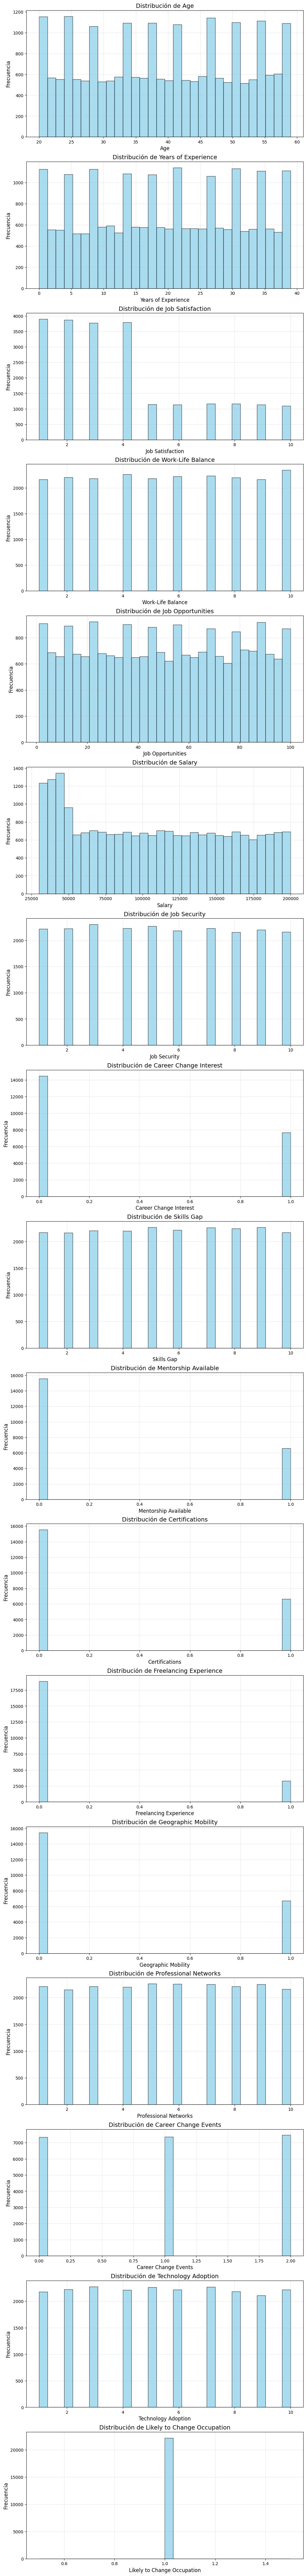

In [20]:
# Configurar el tamaño de la figura y diseño
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5 * num_cols), constrained_layout=True)

# Iterar y crear un histograma para cada columna numérica
for ax, column in zip(axes, numerical_columns):
    ax.hist(df_cambios[column].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    ax.set_title(f'Distribución de {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)
    ax.grid(alpha=0.3)

# Mostrar la figura
plt.show()


### Este Dataset voy a aplicar clasificación para poder saber si alguien va a cambiar o no carrera.

### Me interesa porque es mi situación actual.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Field of Study               38444 non-null  category
 1   Current Occupation           38444 non-null  category
 2   Age                          38444 non-null  int64   
 3   Gender                       38444 non-null  category
 4   Years of Experience          38444 non-null  int64   
 5   Education Level              38444 non-null  category
 6   Industry Growth Rate         38444 non-null  category
 7   Job Satisfaction             38444 non-null  int64   
 8   Work-Life Balance            38444 non-null  int64   
 9   Job Opportunities            38444 non-null  int64   
 10  Salary                       38444 non-null  int64   
 11  Job Security                 38444 non-null  int64   
 12  Career Change Interest       38444 non-null  int64   
 13  S

In [22]:
#df['Field of Study'].value_counts()
#df['Current Occupation'].value_counts()
#df['Gender'].value_counts()
#df['Education Level'].value_counts()
#df['Industry Growth Rate'].value_counts()
df['Family Influence'].value_counts()

Family Influence
High      19267
Medium     9618
Low        9559
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Paso 1: Separar los datos predictivos de la columna objetivo
X = df.drop('Likely to Change Occupation', axis=1)  # Variables predictoras
y = df['Likely to Change Occupation']  # Variable objetivo

# Paso 2: Identificar columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Paso 3: Preprocesamiento de datos - convertir datos categóricos en numéricos
# Usaremos un 'ColumnTransformer' para aplicar One-Hot Encoding a las columnas categóricas
# y dejar las columnas numéricas sin cambios

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Escalamos las columnas numéricas
        ('cat', OneHotEncoder(), categorical_cols)  # Convertimos las columnas categóricas en variables binarias
    ])

# Paso 4: Crear el pipeline con preprocesamiento y clasificación
# Creamos el pipeline que primero transforma los datos y luego ajusta el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Primero procesamos los datos
    ('classifier', RandomForestClassifier(random_state=42))  # Luego entrenamos el modelo
])

# Paso 5: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 6: Ajustar el modelo con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Paso 7: Hacer predicciones con los datos de prueba
y_pred = pipeline.predict(X_test)

# Paso 8: Evaluar el modelo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4880
           1       1.00      1.00      1.00      6654

    accuracy                           1.00     11534
   macro avg       1.00      1.00      1.00     11534
weighted avg       1.00      1.00      1.00     11534




Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4880
           1       1.00      1.00      1.00      6654

    accuracy                           1.00     11534
   macro avg       1.00      1.00      1.00     11534
weighted avg       1.00      1.00      1.00     11534



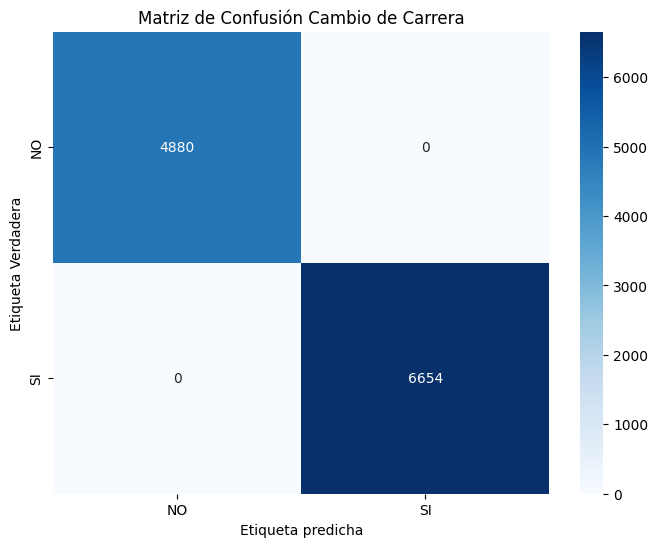

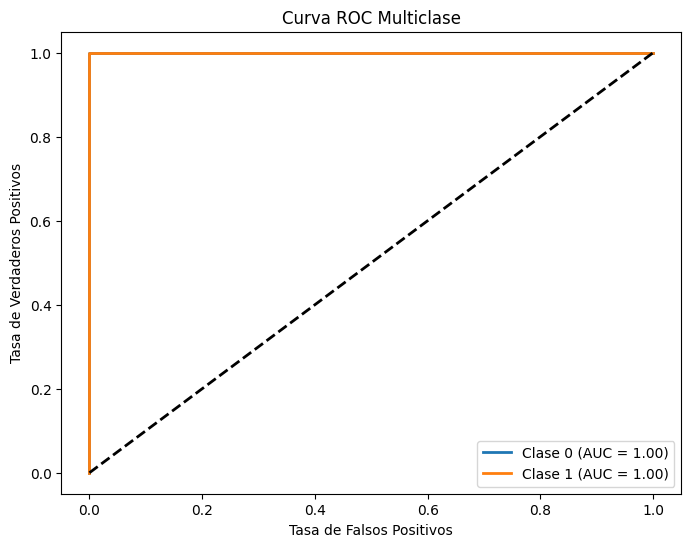

In [24]:
# Paso 1: Separar los datos predictivos de la columna objetivo
X = df.drop('Likely to Change Occupation', axis=1)  # Variables predictoras
y = df['Likely to Change Occupation']  # Variable objetivo

# Paso 2: Identificar columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Paso 3: Preprocesamiento de datos - convertir datos categóricos en numéricos
# Usamos un 'ColumnTransformer' para aplicar One-Hot Encoding a las columnas categóricas
# y dejar las columnas numéricas sin cambios
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Escalamos las columnas numéricas
        ('cat', OneHotEncoder(), categorical_cols)  # Convertimos las columnas categóricas en variables binarias
    ])

# Paso 4: Crear el pipeline con preprocesamiento y clasificación
# Creamos el pipeline que primero transforma los datos y luego ajusta el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Primero procesamos los datos
    ('classifier', RandomForestClassifier(random_state=42))  # Luego entrenamos el modelo
])

# Paso 5: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 6: Ajustar el modelo con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Paso 7: Hacer predicciones con los datos de prueba
y_pred = pipeline.predict(X_test)

# Paso 8: Evaluar el modelo con el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))  # Mostramos el reporte de clasificación

# Paso 9: Matriz de confusión# Nombres personalizados para las etiquetas
target_names = ['NO', 'SI']  # NO para 0 y SI para 1

# Graficamos la matriz de confusión
#plot_confusion_matrix(cm, target_names, "Matriz de Confusión Cambio de Carrera")
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, target_names, "Matriz de Confusión Cambio de Carrera")

# Paso 10: Curva ROC y AUC
# Primero, tenemos que codificar las etiquetas para la clasificación binaria (en caso de que sea multicategoría)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_prob = pipeline.predict_proba(X_test)  # Obtenemos las probabilidades para cada clase

# Si el problema es multiclase, usamos la clase 1 (la de interés) para calcular la curva ROC
# Ajustamos a la cantidad de clases presentes
n_classes = len(label_encoder.classes_)

# Dibujar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Para cada clase calculamos el AUC y la ROC
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, y_pred_prob[:, i])  # ROC para cada clase
    roc_auc[i] = auc(fpr[i], tpr[i])  # Área bajo la curva

    plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

# Dibujamos la línea diagonal (modelo aleatorio)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()


In [27]:
# Configuración para la validación cruzada
cv_folds = 5  # Número de pliegues (folds)

# Usamos cross_val_score para realizar la validación cruzada
cv_scores = cross_val_score(
    pipeline,  # El pipeline que incluye preprocesamiento y modelo
    X,         # Variables predictoras originales
    y,         # Variable objetivo original
    cv=cv_folds,  # Número de particiones
    scoring='accuracy'  # Métrica de evaluación (puedes cambiarla si lo necesitas)
)

# Reporte de validación cruzada
print(f"\nValidación Cruzada ({cv_folds} pliegues):")
print(f"Exactitud promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")
print(f"Puntajes por pliegue: {cv_scores}")



Validación Cruzada (5 pliegues):
Exactitud promedio: 0.9999
Desviación estándar: 0.0001
Puntajes por pliegue: [0.99973989 1.         1.         1.         1.        ]
